# Chapter 3: Data Structures

Pandas bao gồm 2 data structures (Series, DataFrame)

| Data Structure | Dimensionality | Spreadsheet Analog | Database Analog | Linear Algebra |
| :------------: | :------------: | :----------------: | :-------------: | :------------: |
| Series         | 1D             | Column             | Column          | Column         |
|  DataFrame     | 2D             | Single Sheet       | Table           | Vector Matrix  |

- Cả 2 đều có index
- Trong DataFrame có nhiều columns là Series

## 3.1 Summary

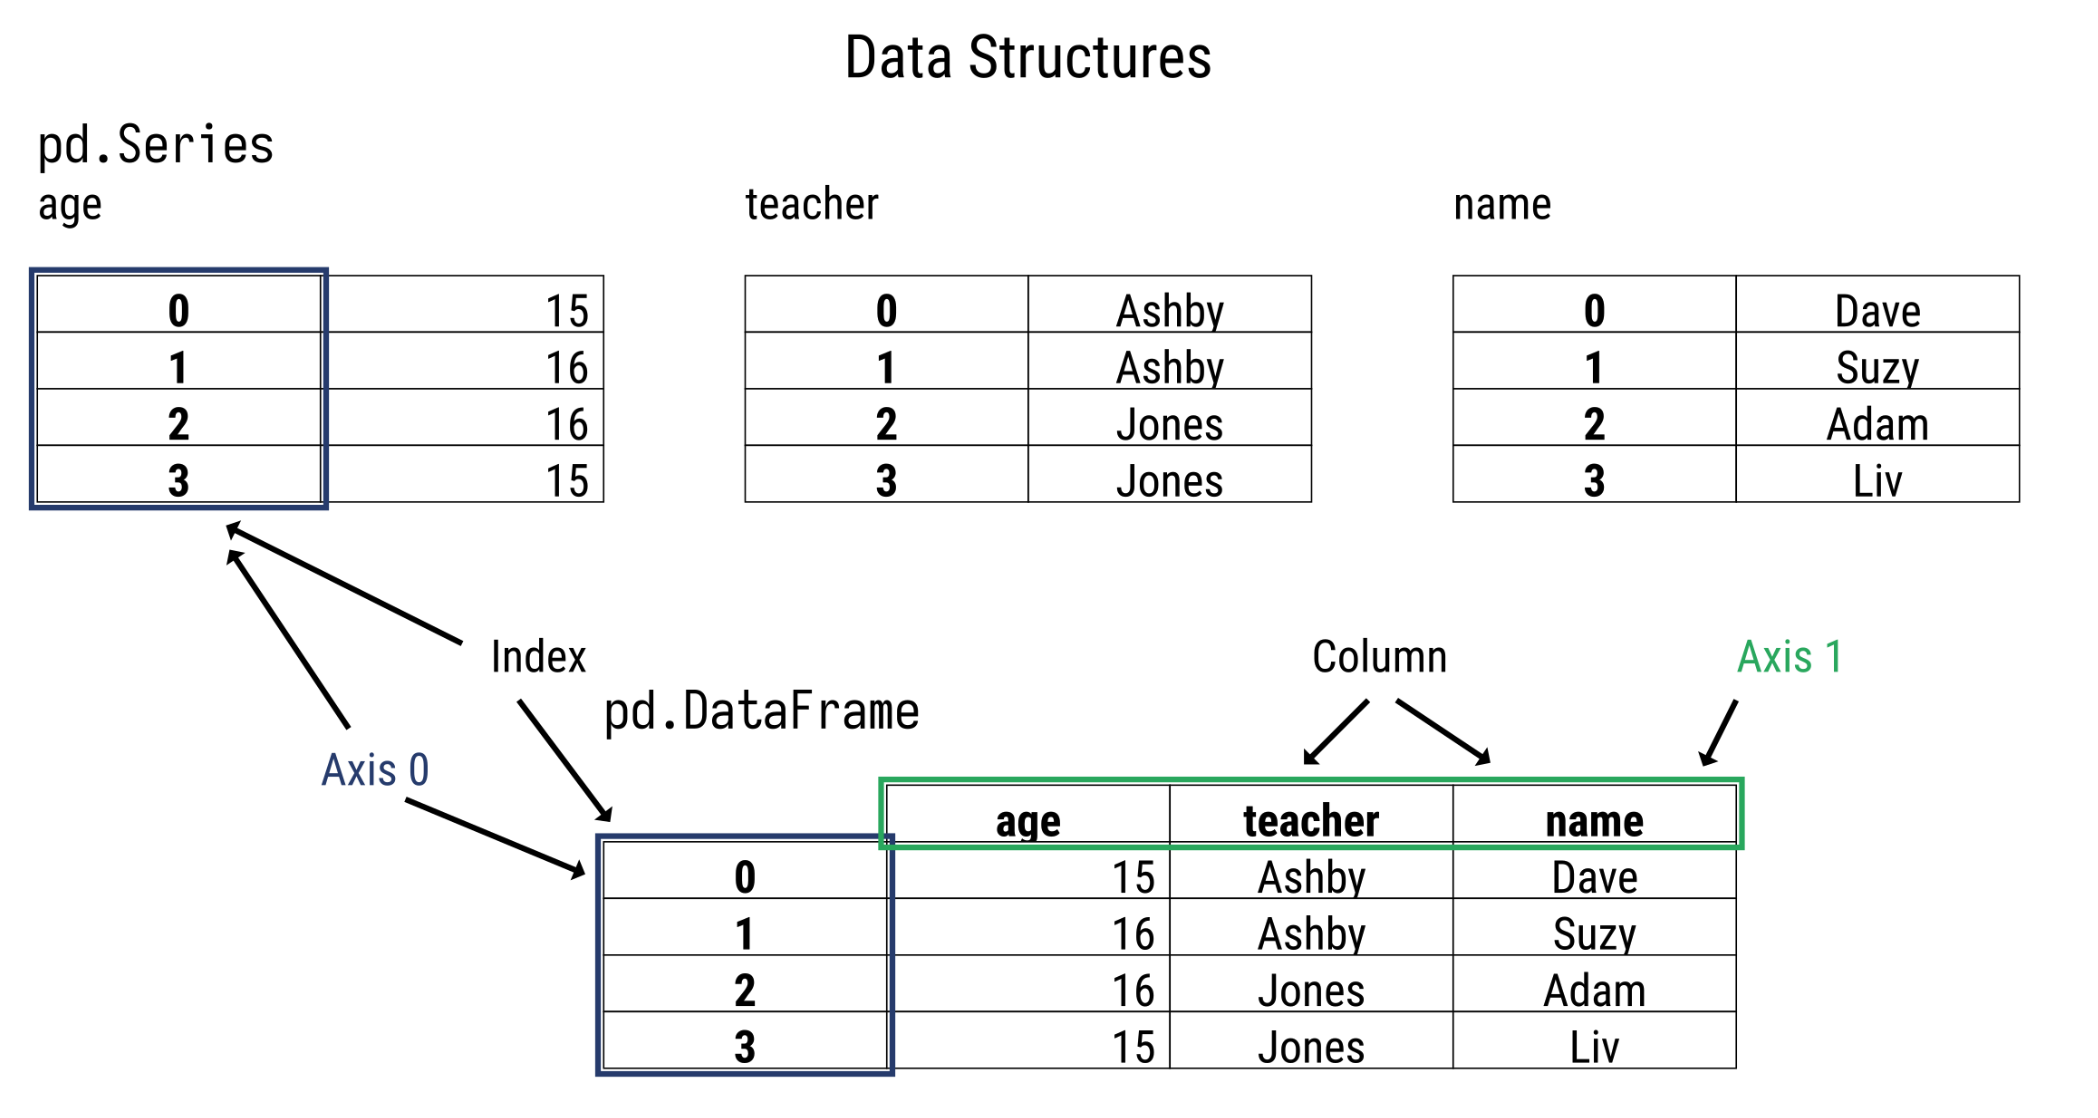</img>

Mối liên hệ giữa DataFrame và Series

## 3.2 Exercises

1. If you had a spreadsheet with data, which pandas data structure would you use to hold the data? Why?
$\to$ DataFrame
2.  If you had a database with data, which pandas data structure would you use to hold the data? Why?
$\to$ DataFrame

# Chapter 4: Series Introduction

- one-dimensional data
- has a few more bits of data, including an index and a name
- A common idea through pandas is the notion of an axis
    - Because a series is one-dimensional, it has a single axis—the index.

In [2]:
series = {
    'index': [0, 1, 2, 3],
    'data': [145, 142, 38, 13],
    'name': 'song'
}

In [3]:
def get(series, idx):
    value_idx = series['index'].index(idx) 
    return series['data'][value_idx]

In [4]:
get(series, 1)

142

## 4.1 The index abstraction

In [5]:
songs = {
    'index': ['Paul', 'John', 'George', 'Ringo'],
    'data': [145, 142, 38, 13],
    'name': 'counts'
}

get(songs, 'Paul')

145

## 4.2 The pandas Series

In [6]:
import pandas as pd

In [7]:
songs2 = pd.Series([145, 142, 38, 13], name="counts")

In [8]:
songs2

0    145
1    142
2     38
3     13
Name: counts, dtype: int64

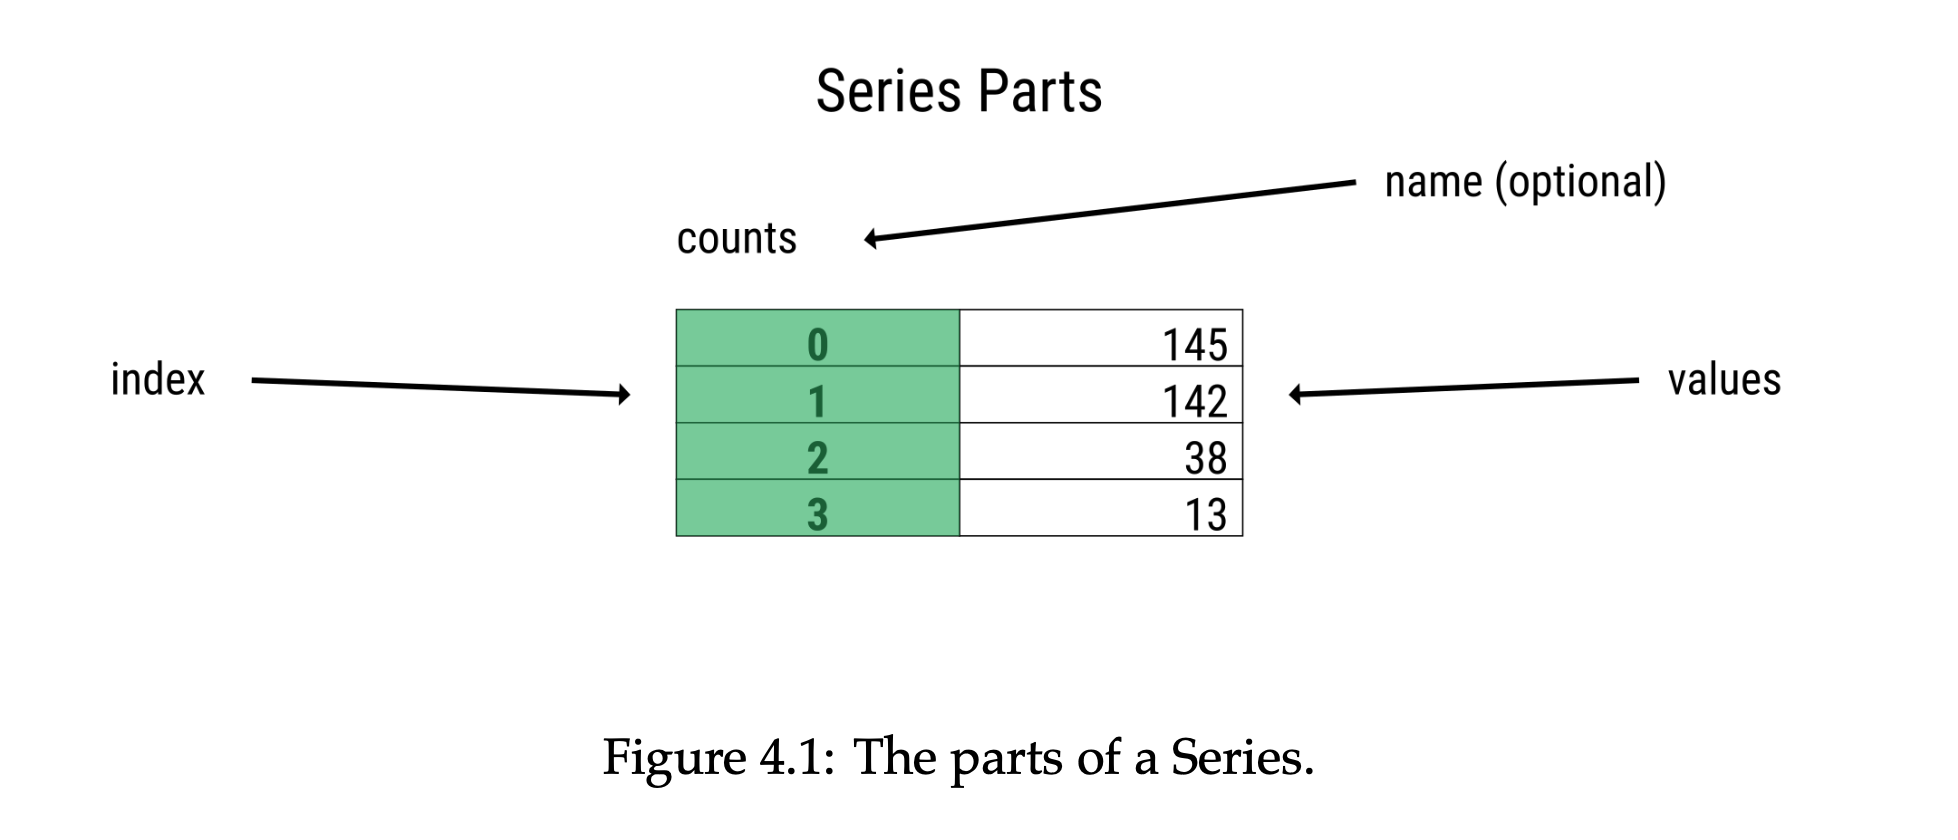</img>

In [9]:
songs2.index

RangeIndex(start=0, stop=4, step=1)

**The actual data (or values) for a series does not have to be numeric or homogeneous.**

In [13]:
class Foo:
    pass
ringo = pd.Series(['Richard', 'Starkey', 13, Foo()])
ringo

0                                 Richard
1                                 Starkey
2                                      13
3    <__main__.Foo object at 0x1331c9bd0>
dtype: object

- Kiểu object khi các thành phần xong series không đồng nhất kiểu dữ liệu
- Kiểu object được dùng cho string series
- Khi series là dạng date string, cần chuyển sang `datetime64[ns]`

## 4.3 The NaN value

In [18]:
import numpy as np

In [21]:
nan_series = pd.Series([1, 2, 3, np.nan])
nan_series

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [22]:
nan_series.count()

3

Khi dùng `.count()` nó sẽ trả về số lượng phần tử không phải `nan` trong series

In [23]:
nan_series.size

4

Để kiểm tra số lượng `nan` tính chênh lệch giữa `.size` và `.count()`

In [26]:
len(nan_series) # tương tự .size

4

Các dạng dữ liệu được xem là NULL trong pandas:
- `None`
- `NaN`
- `nan`
- `<NA>`
- `null`

## 4.4 Optional Integer Support for NaN

- `int64` type does not support missing data.
- As of pandas 0.24, there is optional support for another integer type that can hold missing values denoted as `<NA>` below.
- The documentation calls this type the nullable integer type.
- When you create a series, you can pass in `dtype='Int64'` (note the capitalization):

In [32]:
nan_series2 = pd.Series([1, 2, 3, None], dtype='Int64')
nan_series2

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [33]:
nan_series2.count()

3

In [34]:
nan_series

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [37]:
nan_series.astype('Int64')

0       1
1       2
2       3
3    <NA>
dtype: Int64

## 4.5 Similar to NumPy

In [41]:
numpy_series = np.array([145, 142, 38, 13])

In [42]:
songs2[1]

142

In [43]:
numpy_series[1]

142

They both have methods in common:

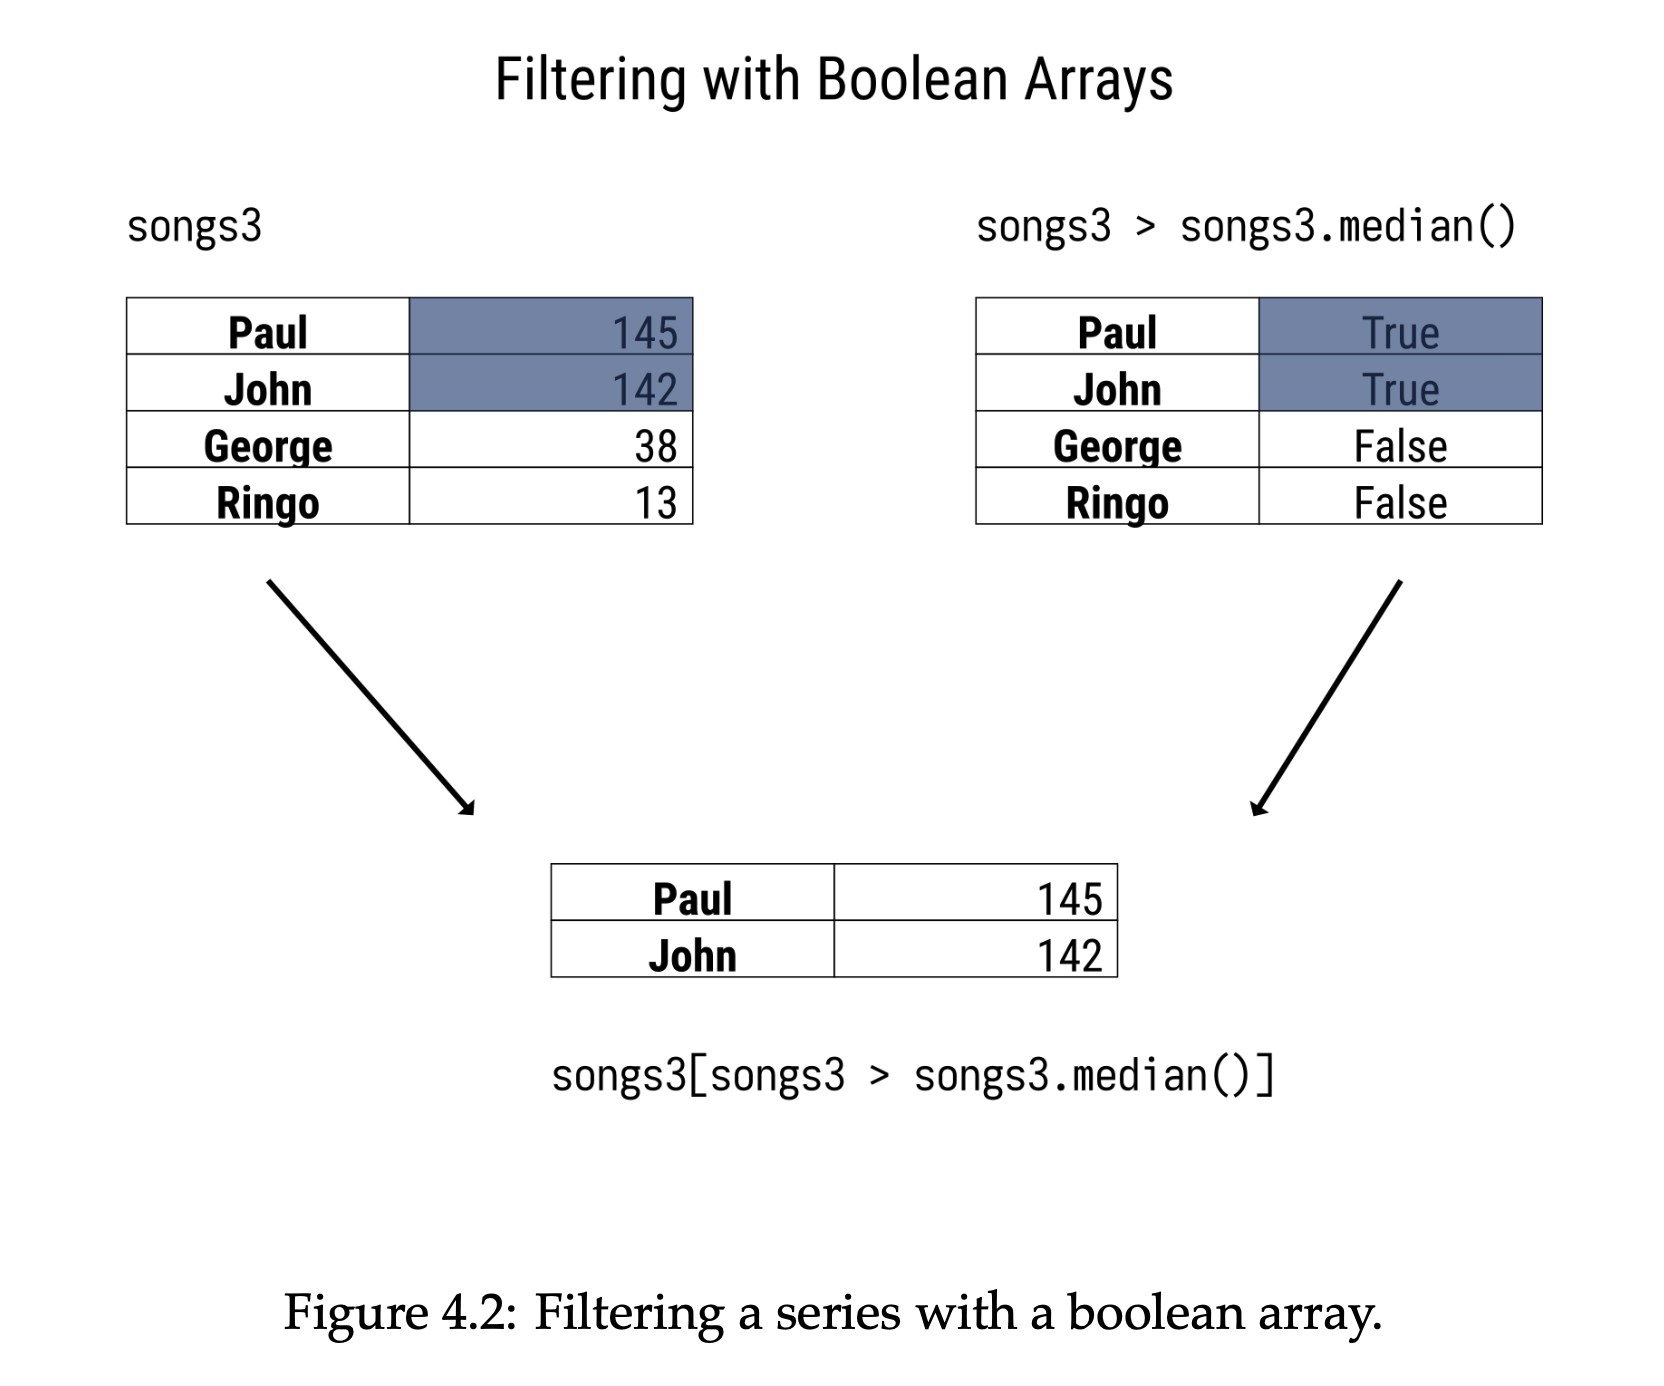</img>

In [44]:
songs2.mean()

84.5

In [45]:
numpy_series.mean()

84.5

In [48]:
mask = songs2 > songs2.median() # boolean array

In [49]:
mask

0     True
1     True
2    False
3    False
Name: counts, dtype: bool

<br>
<br>

**Once we have a mask, we can use that as a filter.**

In [51]:
songs2[mask]

0    145
1    142
Name: counts, dtype: int64

In [53]:
numpy_series[numpy_series > np.median(numpy_series)]

array([145, 142])

## 4.6 Categorical Data

- When you load data, you can indicate that the data is categorical.
- If we know that our data is limited to a few values;
- Categorical values have a few benefits:
    - Use less memory than strings
    - Use less memory than strings
    - Improve performance
    - Can perform operations on categories
    - Enforce membership on values

Để dùng ta có thể thêm `dtype="category"` hoặc `.astype("category")`

In [54]:
category = pd.Series(['m', 'l', 'xs', 's', 'xl'], dtype="category")
category

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

In [56]:
category.cat.ordered # Kiểm tra category bằng cách inspect vào cat attribtue

False

In [58]:
ordered_cate = pd.Series(['m', 'l', 'xs', 's', 'xl'])
ordered_cate_type = pd.api.types.CategoricalDtype(categories=['xs', 's', 'm', 'l', 'xl'], ordered=True)
ordered_cate.astype(ordered_cate_type)

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

In [61]:
category.cat.reorder_categories(new_categories=['xs', 's', 'm', 'l', 'xl'], ordered=True)

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

<br>
<br>

**Đối với string hoặc datetime có attribute `str` hoặc `dt` để truy cập vào từng đối tượng**

In [65]:
s3 = pd.Series(['a', 'b', 'c'])

In [69]:
s3.str.upper()

0    A
1    B
2    C
dtype: object

<br>
<br>

**Series Overview Attributes and Methods:**

|Method|Description|
|------|-----------|
| `pd.Series(data=None, index=None, dtype=None, name=None, copy=False)`|Create a series from data (sequence, dictionary, or scalar).|
|`s.index`|Access index of series.|
|`s.astype(dtype, errors='raise')`|Cast a series to dtype. To ignore errors (and return original object) use `errors='ignore'`.|
|`s[boolean_array]`|Return values from s where boolean_array is True.|
|`s.cat.ordered`|Determine if a categorical series is ordered.|
|`s.cat.reorder_categories(new_categories, ordered=False)`|Add categories (potentially ordered) to the series. new_categories must include all categories.|

## 4.7 Summary

- The Series object is a one-dimensional data structure.
- It can hold numerical data, time data, strings, or arbitrary Python objects.
- If you are dealing with numeric data, using pandas rather than a Python list will benefit you.
- Pandas is faster, consumes less memory, and comes with built- in methods that are very useful to manipulate the data.
- Also, the index abstraction allows for accessing values by position or label.
- A Series can also have empty values and has some similarities to NumPy arrays.

## 4.8 Exercises

**1. Using Jupyter, create a series with the temperature values for the last seven days. Filter out the values below the mean.**

In [71]:
temp = pd.Series([30, 45, 23, 32, 34, 21, 13])
temp.size

7

In [73]:
temp[temp < temp.mean()]

2    23
5    21
6    13
dtype: int64

**2. Using Jupyter, create a series with your favorite colors. Use a categorical type.**

In [74]:
color = pd.Series(['red', 'blue', 'green'], dtype='category')
color

0      red
1     blue
2    green
dtype: category
Categories (3, object): ['blue', 'green', 'red']

# Chapter 5: Series Deep Dive

## 5.1 Loading the Data

In [3]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/' \
      'vehicles.csv.zip'
df = pd.read_csv(url, dtype='object')

In [4]:
city_mpg = df.city08.copy().astype('int64')
highway_mpg = df.highway08.copy().astype('int64')

In [5]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [88]:
highway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
41139    26
41140    28
41141    24
41142    24
41143    21
Name: highway08, Length: 41144, dtype: int64

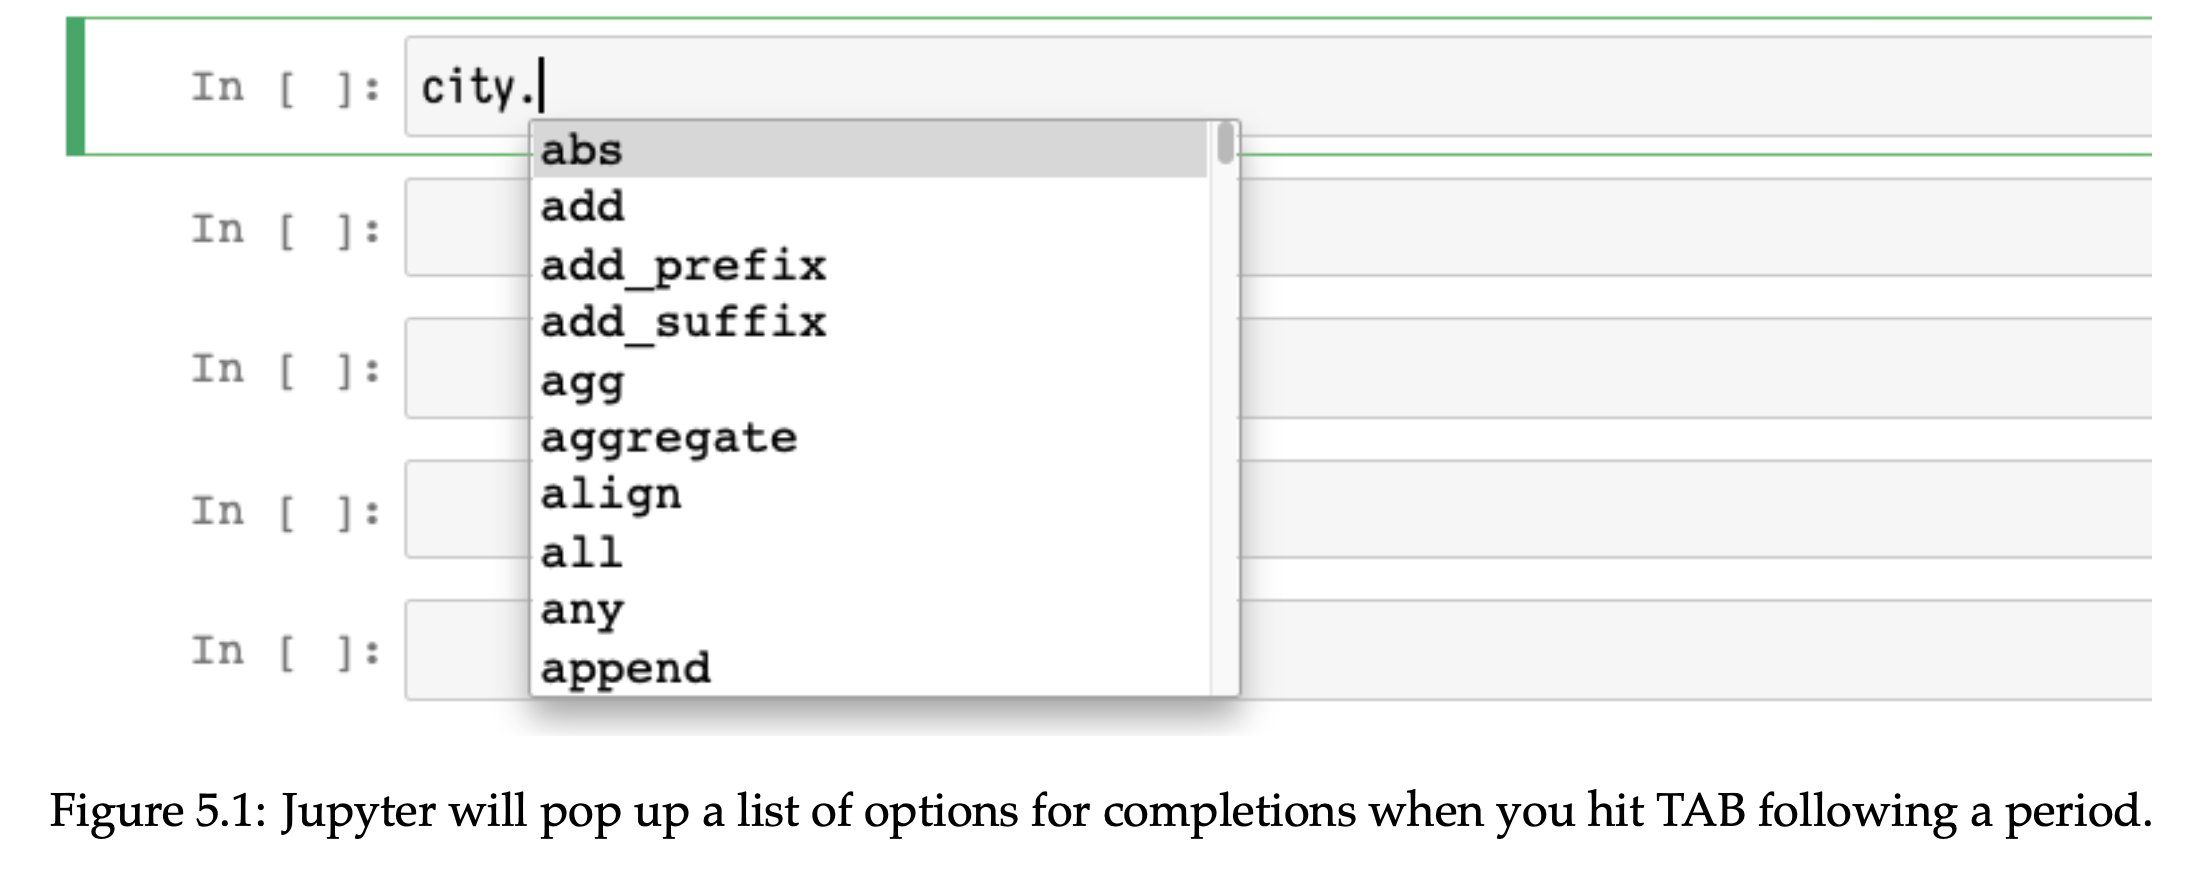</img>

## 5.2 Series Attributes

In [92]:
len(
    dir(city_mpg) # return list of attributes in city_mpg
)

411

- Có 411 attributes trong series
- Pythons list hoặc dict chỉ có khoảng 40

**Summary:**
- Dunder methods (`.__add__`, `.__iter__`, etc) provide many numeric operations, looping, attribute access, and index access.
- Corresponding operator methods for many of the numeric operations allow us to tweak the behavior (there is an .add method in addition to `.__add__`).
- Các hàm tổng hợp mà giảm hoặc tổng hợp giá trị trong series thành scalar value (`.mean`, `.max`, `.sum`, ...)
- Convert method, bắt đầu bằng `.to_...`
- Manipulation methods: `.sort_values`, `.drop_duplicates` trả về series với cùng index
- Indexing and accessor methods: `.loc` hoặc `.iloc`
- String manipulation `.str`
- Date manipulation `.dt`
- Categorical manipulation `.cat`
- Plotting `.plot`
- Transformation methods `.unstack`, `.add`, `reset_index`, `transform`
- Attribute như `.index` hoặc `.dtype`
- Một số private attribute không cần quan tâm

# Chapter 6: Operators (& Dunder Methods)

## 6.2 Dunder Methods

In [95]:
2 + 4

6

In [96]:
(2).__add__(4)

6

In [97]:
(city_mpg + highway_mpg)/2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

## 6.3 Index Alignment

In [98]:
s1 = pd.Series([10, 20, 30], index=[1,2,2])
s2 = pd.Series([35, 44, 53], index=[2,2,4])
s1 + s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

## 6.4 Broadcasting

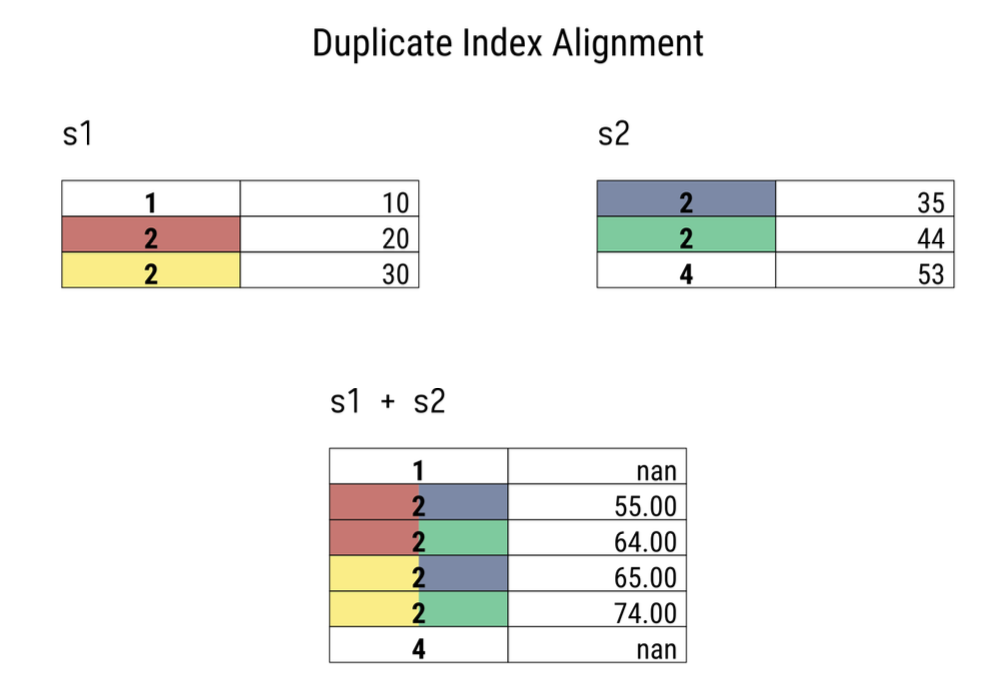</img>

In [103]:
s1.add(s2, fill_value=0)

1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64

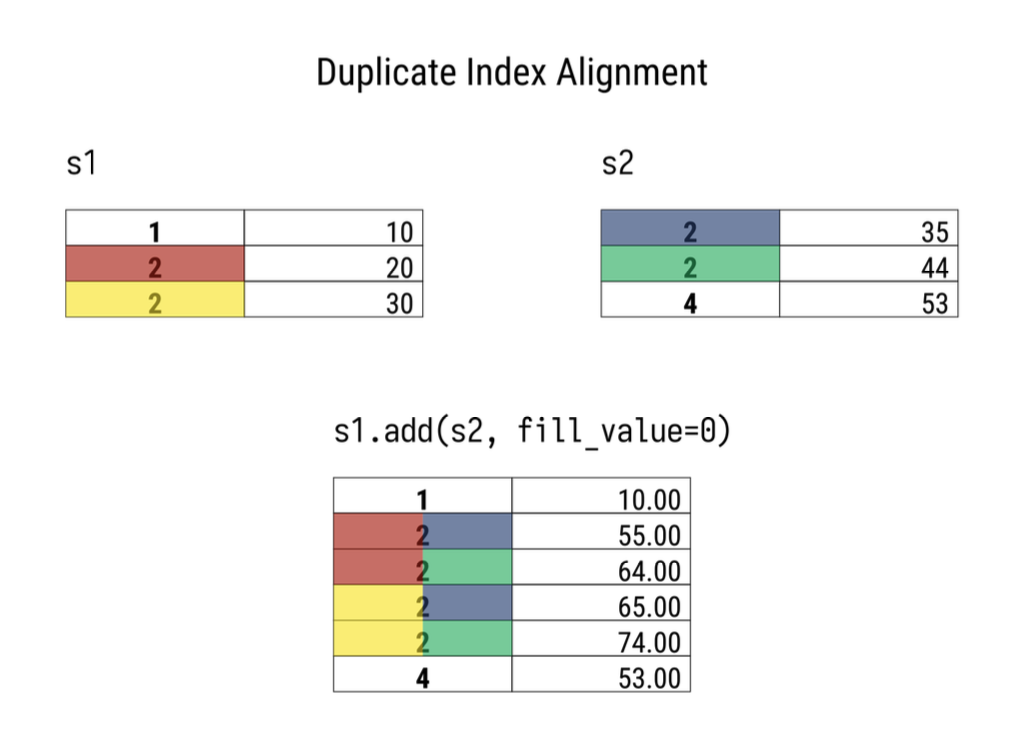</img>

**Operators:**
- `+` `-` `*` `/`
- `//` floor division
- `%` modulus
- `@` matrix multiplication
- `**` power
- `<` `<=` `==` `>` `>=` `!=`
- `&` binary and
- `^` binary xor
- `|` binary or
- `~` not

## 6.5 Iteration

`.__iter__` dùng để loop qua các phần tử trong series

In [104]:
s1

1    10
2    20
2    30
dtype: int64

In [106]:
for elem in s1:
    print('elem', elem)

elem 10
elem 20
elem 30


## 6.7 Chaining

- Vì hầu hết các methods của pandas không mutate data
- Chaining giúp dễ đọc code
- Có thể chain với operator nhưng phải đóng mở ngoặc

In [108]:
(city_mpg + 
     highway_mpg) / 2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

In [109]:
(city_mpg
    .add(highway_mpg)
    .div(2)
)

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

In [110]:
city_mpg \
    .add(highway_mpg) \
    .div(2)

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

|Method|Operator|Description|
|:--:|:--:|:--:|
|`s.add(s2)`|s + s2|Adds series|
|`s.radd(s2)`|s2 + s|Adds series|
|`s.sub(s2)`|s - s2|Subtracts series|
|`s.rsub(s2)`|s2 - s|Subtracts series|
|`s.mul(s2)` `s.multiply(s2)`|s * s2|Multiplies series|
|`s.rmul(s2)`|s2 * s|Multiplies series|
|`s.div(s2)` `s.truediv(s2)`|s / s2|Divides series|
|`s.rdiv(s2)` `s.rtruediv(s2)`|s2 / s|Divides series|
|`s.mod(s2)`|s % s2|Modulo of series division|
|`s.rmod(s2)`|s2 % s|Modulo of series division|
|`s.floordiv(s2)`|s // s2|Floor divides series|
|`s.rfloordiv(s2)`|s2 // s|Floor divides series|
|`s.pow(s2)`|s ** s2|Exponential power of series|
|`s.rpow(s2)`|s2 ** s|Exponential power of series|
|`s.eq(s2)`|s2 == s|Elementwise equals of series|
|`s.ne(s2)`|s2 != s|Elementwise not equals of series|
|`s.gt(s2)`|s > s2|Elementwise greater than of series|
|`s.ge(s2)`|s >= s2|Elementwise greater than or equals of series|
|`s.lt(s2)`|s < s2|Elementwise less than of series|
|`s.le(s2)`|s <= s2|Elementwise less than or equals of series|
|`np.invert(s)`|~s|Elementwise inversion of boolean series (no pandas method).|
|`np.logical_and(s, s2)`|s & s2|Elementwise logical and of boolean series (no pandas method).|
|`np.logical_or(s, s2)`|s \| s2|Elementwise logical or of boolean series (no pandas method).|

## 6.9 Exercises

**1. Add a numeric series to itself.**

In [114]:
s1.add(s1)

1    20
2    40
2    60
dtype: int64

<br>

**2. Add 10 to a numeric series.**

In [115]:
s1.add(10)

1    20
2    30
2    40
dtype: int64

# Chapter 7: Aggregate Methods

Your boss doesn’t care about that level of detail. They care about:
- How many people came in (count)
- How much food was ordered (count)
- What was the total revenue (sum)
- When did people come (skew)
- What was the average purchase amount (mean)

## 7.1 Aggregations

 Calculate the mean value of a series

In [116]:
city_mpg.mean()

18.369045304297103

There are also a few aggregate properties. These start with .is_. You do not call them; they will evaluate to True or False:

In [118]:
city_mpg.is_unique

False

In [120]:
city_mpg.is_monotonic_increasing

False

In [123]:
city_mpg.sort_values().is_monotonic_increasing

True

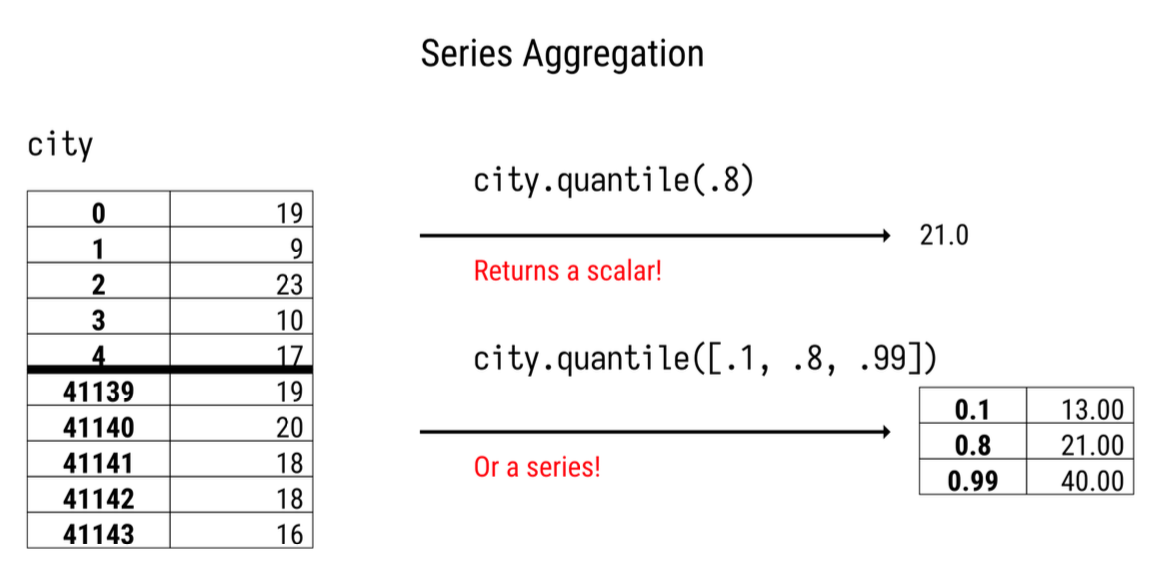</img>

In [124]:
city_mpg.quantile()

17.0

In [127]:
city_mpg.median()

17.0

In [125]:
city_mpg.quantile(0.9)

24.0

In [128]:
city_mpg.quantile([.25, .5, .75])

0.25    15.0
0.50    17.0
0.75    20.0
Name: city08, dtype: float64

## 7.2 Count and Mean of an Attribute

**Trick: khi muốn tính tổng trường hợp thoả điều kiện**

In [130]:
city_mpg \
    .gt(20) \
    .sum()

10272

**Trick: khi muốn % trường hợp thoả điều kiện**

In [139]:
city_mpg \
    .gt(20) \
    .mul(100) \
    .mean() \
    .round(3)

24.966

## 7.3 `.agg` and Aggregation Strings

In [157]:
city_mpg.agg('mean') # return a scalar value

18.369045304297103

In [159]:
import numpy as np
def last(s):
    return s.iloc[-1]
city_mpg.agg(['mean', 'median', np.var, last]) # return a series

mean      18.369045
median    17.000000
var       62.503036
last      16.000000
Name: city08, dtype: float64

<br><br>

**Below are strings that the .agg method accepts.**

|Method|Description|
|---|---|
|`all`|Returns True if every value is truthy.|
|`any`|Trả về True nếu any value là truthy|
|`autocorr`|Returns Pearson correlation of series with shifted self. Can override lag as keyword|
|`corr`|Returns Pearson correlation of series with other series. Need to specify other.|
|`count`|Returns count of non-missing values.|
|`cov`|Return covariance of series with other series. Need to specify other.|
|`dtype`|Type of the series|
|`dtypes`|Type of the series|
|`empty`|True if no values in series.|
|`hasnans`|True if missing values in series.|
|`idxmax`|Returns index value of maximum value.|
|`idxmin`|Returns index value of minimum value. 'is_monotonic' True if values always increase.|
|`is_monotonic`|True if values always increase.|
|`is_monotonic_decreasing`|True if values always decrease.|
|`is_monotonic_increasing`|True if values always increase.|
|`kurt`|Return ”excess” kurtosis (0 is normal distribution). Values greater than 0 have more outliers than normal.|
|`mad`|Return the mean absolute deviation.|
|`max`|Return the maximum value.|
|`mean`|Return the mean value.|
|`median`|Return the median value.|
|`min`|Return the minimum value.|
|`nbytes`|Return the number of bytes of the data.|
|`ndim`|Return the number of dimensions (1) of the data.|
|`nuique`|Return the count of unique values.|
|`quantile`|Return the median value. Can override q to specify other quantile.|
|`sem`|Return the unbiased standard error.|
|`size`|Return the size of the data.|
|`skew`|Return the unbiased skew of the data. Negative indicates tail is on the left side.|
|`std`|Return the standard deviation of the data.|
|`sum`|Return the sum of the series.|

## 7.5 Exercises

With a dataset of your choice:
1. Find the count of non-missing values of a series.
2. Find the number of entries of a series.
3. Find the number of unique entries of a series.
4. Find the mean value of a series.
5. Find the maximum value of a series.
6. Use the .agg method to find all of the above.

In [170]:
city_mpg.agg(
    {
        'Number of non-missing values':'count', 
        'Number of entries': len, 
        'Number of unique': 'nunique', 
        'Mean': 'mean', 
        'Max': 'max'
    }
)

Number of non-missing values    41144.000000
Number of entries               41144.000000
Number of unique                  105.000000
Mean                               18.369045
Max                               150.000000
Name: city08, dtype: float64

# Chapter 8: Conversion Methods

## 8.1 Automatic Conversion

Tại pandas 1.0, hàm convert_dtype() cố gắng chuyển Series sang dạng hỗ trợ `pd.NA`

Ví dụ: int64 $\to$ It64

In [173]:
city_mpg.convert_dtypes()

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: Int64

In [174]:
city_mpg.astype('Int64')

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: Int64

In [176]:
city_mpg.astype('Int8', errors='ignore')

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

<mark>**Không chuyển được từ Int64 về Int8**</mark>

`TypeError: cannot safely cast non-equivalent int64 to int8`

In [179]:
np.iinfo('int64')

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [180]:
np.iinfo('int8')

iinfo(min=-128, max=127, dtype=int8)

In [182]:
np.finfo('float64')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [184]:
np.finfo('float16')

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

## 8.2 Memory Usage

In [188]:
city_mpg.nbytes

329152

In [189]:
city_mpg.astype('Int16').nbytes

123432

In [195]:
city_mpg.memory_usage()

329284

Using `.nbytes` with object types only shows how much memory the Pandas object is taking.

In [197]:
city_mpg.memory_usage(deep=True)

329284

**`deep=True` với string nó sẽ nhiều hơn vì nó là kiểu object**

**Nếu lưu từ string sang category thì bộ nhớ sẽ tốn ít hơn, check bằng `memory_usage`**

## 8.3 String and Category Types

In [198]:
city_mpg.astype(str)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: object

In [199]:
city_mpg.astype('category')

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6, 7, 8, 9, ..., 137, 138, 140, 150]

- A categorical series is useful for string data and can result in large memory savings.
- This is because pandas stores Python strings when you have string data
- When you convert it to categorical data, pandas no longer uses Python strings for each value but optimizes it, so repeating values are not duplicated.
- You still have all of the functionality found off of the `.str` attribute, but it comes with potentially large memory savings (if you have many duplicate values) and performance boosts as you do not need to perform as many string operations.

## 8.4 Ordered Categories

Để tạo ordered category type sử dụng class `CategoryDtype`

In [13]:
city_type = pd.CategoricalDtype(
    categories=sorted(set(city_mpg)),
    ordered=True
)
city_mpg.astype(city_type)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6 < 7 < 8 < 9 ... 137 < 138 < 140 < 150]

The following table lists the types that you can pass into .astype.

|String or Type|Description|
|--|--|
|`str` `'str'`|Convert type to Python string|
|`'string'`|Convert type to pandas string (supports `pd.NA`)|
|`int` `'int'` `'int64'`|Convert type to NumPy int64|
|`'int32'` `uint32`|Convert type to 32 signed or unsigned NumPy integer (can also use 16 and 8).|
|`Int64`|Convert type to pandas Int64 (supports `pd.NA`). Might complain when you|
|`float` `'float'` `'float64'`|Convert type to NumPy float64 (can also support 32 or 16).|
|`'category'`|Convert type to categorical (supports `pd.NA`). Can also use instance of `CategoricalDtype`.|
|`dates`|Don’t use this for date conversion, use `pd.to_datetime`.|

## 8.5 Converting to Other Types

- `.to_numpy()` hay `.values`: trả về một numpy array
- `.to_list()`: trả về python list
- `.to_frame()`: trả về dataframe

In [14]:
city_mpg.to_frame()

,city08
0,19
1,9
2,23
3,10
4,17
...,...
41139,19
41140,20
41141,18
41142,18


In [15]:
city_mpg.to_numpy()

array([19,  9, 23, ..., 18, 18, 16])

Ngoài ra còn có method để chuyển thành:
- `.to_csv`
- `.to_excel`
- `.to_hdf`: hdf5
- `.to_sql`
- `.to_json`

# Chapter 9: Manipulation Methods

## 9.1 `.apply` and `.where`

## 9.2 If Else with Pandas

## 9.3 Missing Data

## 9.4 Filling In Missing Data

## 9.5 Interpolating Data

## 9.6 Clipping Data

## 9.7 Sorting Values

## 9.8 Sorting the Index

## 9.9 Dropping Duplicates

## 9.10 Ranking Data

## 9.11 Replacing Data

## 9.12 Binning Data